### 영어 단어 분석에 필요한 패키지 준비
# 최초 한번만 설치: Anaconda에 설치됨

In [3]:
%pip install matplotlib
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Nltk 리소스 다운

#### - 아나콘다에 nltk 가 기본으로 설치되어있으므로, pip으로 설치할 필요없음
####    하지만, 최초 한번은 nltk의 리소스를 다운로드 받아야함.

In [5]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# 파일 10개 읽기

# 1. 데이터 준비
### 1-1. 파일 병합

In [6]:
all_files = glob.glob('./exportExcelData_*.xls')
all_files

['.\\exportExcelData_1.xls',
 '.\\exportExcelData_10.xls',
 '.\\exportExcelData_2.xls',
 '.\\exportExcelData_3.xls',
 '.\\exportExcelData_4.xls',
 '.\\exportExcelData_5.xls',
 '.\\exportExcelData_6.xls',
 '.\\exportExcelData_7.xls',
 '.\\exportExcelData_8.xls',
 '.\\exportExcelData_9.xls']

# 1파일에 100개 배열에 총 10개 = 100*10

In [7]:
all_files_data = []     # 저장할 리스트

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일,학위논문사항
0,NaN,1,Holistic Cross-Layer Improvements for Big Data...,"Nguyen, Nam S",University of Massachusetts Boston,2020,해외박사(DDOD)
1,NaN,2,Network Design in the Big-Data Age,"Zhou, Xia","University of California, Santa Barbara",2013,해외박사(DDOD)
2,NaN,3,Machine learning–based prediction model and bi...,연동건,세종대학교 대학원,2024,국내박사
3,NaN,4,Partial EM Procedure for Big-Data Linear Mixed...,"Cho, Jang-Ik",Case Western Reserve University,2018,해외박사(DDOD)
4,NaN,5,Materials data repository and big-data tool fo...,SAMUEL BOATENG,University of Science and Technology,2020,국내박사
...,...,...,...,...,...,...,...
95,NaN,96,A Power-Efficient Framework Based on Big-Data ...,"Uzoh, Paul Chiedozie",경북대학교 대학원,2016,국내석사
96,NaN,97,Efficient electric power production mechanism ...,제승모,"Graduate School, Korea University",2020,국내석사
97,NaN,98,Matrix factorization modeling for recommender ...,지자치,Wonkwang University,2018,국내박사
98,NaN,99,(An) integrated toxicogenomic study using big ...,이상민,Dongguk University,2019,국내박사


In [8]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일,학위논문사항
0,NaN,1,Holistic Cross-Layer Improvements for Big Data...,"Nguyen, Nam S",University of Massachusetts Boston,2020,해외박사(DDOD)
1,NaN,2,Network Design in the Big-Data Age,"Zhou, Xia","University of California, Santa Barbara",2013,해외박사(DDOD)
2,NaN,3,Machine learning–based prediction model and bi...,연동건,세종대학교 대학원,2024,국내박사
3,NaN,4,Partial EM Procedure for Big-Data Linear Mixed...,"Cho, Jang-Ik",Case Western Reserve University,2018,해외박사(DDOD)
4,NaN,5,Materials data repository and big-data tool fo...,SAMUEL BOATENG,University of Science and Technology,2020,국내박사
...,...,...,...,...,...,...,...
995,NaN,96,Power and class conflict in capitalist democra...,"Peoples, Clayton D",The Ohio State University,2005,해외박사(DDOD)
996,NaN,97,End-of-life transition experiences of ICU nurs...,"Moscatel, Sarah J",University of Colorado Health Sciences Center,2005,해외박사(DDOD)
997,NaN,98,Biogeomorphic evolution of new Missouri River ...,"Niebur, Curt Stanley",Washington University,2001,해외박사(DDOD)
998,NaN,99,Estimation of Financial Models Using Moment Co...,"Grynkiv, Iaryna",Duke University,2012,해외박사(DDOD)


# 병합(merge) 파일 저장

In [9]:
all_files_data_concat.to_csv('./riss_bigdata.csv', encoding='utf-8', index=False)

### 1-2. 데이터 전처리 (Pre-processing)

In [10]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title

0      Holistic Cross-Layer Improvements for Big Data...
1                     Network Design in the Big-Data Age
2      Machine learning–based prediction model and bi...
3      Partial EM Procedure for Big-Data Linear Mixed...
4      Materials data repository and big-data tool fo...
                             ...                        
995    Power and class conflict in capitalist democra...
996    End-of-life transition experiences of ICU nurs...
997    Biogeomorphic evolution of new Missouri River ...
998    Estimation of Financial Models Using Moment Co...
999                         Empirical essays on auctions
Name: 제목, Length: 1000, dtype: object

In [11]:
stopwords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [13]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopwords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [17]:
print(words)

[['holistic', 'cross', 'layer', 'improvement', 'big', 'data', 'processing', 'new', 'computing', 'environment'], ['network', 'design', 'big', 'data', 'age'], ['machine', 'learning', 'based', 'prediction', 'model', 'big', 'data', 'associated', 'risk', 'factor', 'covid'], ['partial', 'em', 'procedure', 'big', 'data', 'linear', 'mixed', 'effect', 'model', 'generalized', 'ppe', 'high', 'dimensional', 'data', 'julia'], ['material', 'data', 'repository', 'big', 'data', 'tool', 'data', 'driven', 'material', 'science'], ['multi', 'objective', 'optimization', 'big', 'data', 'transfer'], ['quantifying', 'placeness', 'local', 'commercial', 'district', 'using', 'social', 'big', 'data'], ['spectral', 'top', 'n', 'computationally', 'efficient', 'top', 'n', 'algorithm', 'big', 'data', 'analytics'], ['long', 'short', 'term', 'prediction', 'algal', 'bloom', 'using', 'machine', 'learning', 'modeling', 'approach', 'based', 'big', 'data', 'mining', 'along', 'water', 'quality', 'assessment', 'management'], 

In [19]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2)

['holistic', 'cross', 'layer', 'improvement', 'big', 'data', 'processing', 'new', 'computing', 'environment', 'network', 'design', 'big', 'data', 'age', 'machine', 'learning', 'based', 'prediction', 'model', 'big', 'data', 'associated', 'risk', 'factor', 'covid', 'partial', 'em', 'procedure', 'big', 'data', 'linear', 'mixed', 'effect', 'model', 'generalized', 'ppe', 'high', 'dimensional', 'data', 'julia', 'material', 'data', 'repository', 'big', 'data', 'tool', 'data', 'driven', 'material', 'science', 'multi', 'objective', 'optimization', 'big', 'data', 'transfer', 'quantifying', 'placeness', 'local', 'commercial', 'district', 'using', 'social', 'big', 'data', 'spectral', 'top', 'n', 'computationally', 'efficient', 'top', 'n', 'algorithm', 'big', 'data', 'analytics', 'long', 'short', 'term', 'prediction', 'algal', 'bloom', 'using', 'machine', 'learning', 'modeling', 'approach', 'based', 'big', 'data', 'mining', 'along', 'water', 'quality', 'assessment', 'management', 'genetic', 'marker

# 2. 데이터 탐색
## 2-1. 단어 빈도 탐색

In [20]:
count = Counter(words2)
count

Counter({'data': 753,
         'big': 413,
         'analysis': 160,
         'based': 156,
         'using': 132,
         'system': 110,
         'learning': 104,
         'study': 99,
         'model': 82,
         'analytics': 63,
         'application': 62,
         'method': 62,
         'processing': 57,
         'driven': 55,
         'machine': 51,
         'network': 50,
         'management': 48,
         'approach': 44,
         'development': 44,
         'efficient': 40,
         'design': 37,
         'social': 37,
         'factor': 36,
         'mining': 34,
         'performance': 34,
         'high': 33,
         'time': 33,
         'modeling': 31,
         'large': 30,
         'service': 29,
         'framework': 28,
         'prediction': 27,
         'computing': 26,
         'research': 26,
         'algorithm': 25,
         'technique': 25,
         'cloud': 25,
         'technology': 25,
         'statistical': 25,
         'market': 25,
         'optimizatio

## 상위 50개

In [21]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 753
big : 413
analysis : 160
based : 156
using : 132
system : 110
learning : 104
study : 99
model : 82
analytics : 63
application : 62
method : 62
processing : 57
driven : 55
machine : 51
network : 50
management : 48
approach : 44
development : 44
efficient : 40
design : 37
social : 37
factor : 36
mining : 34
performance : 34
high : 33
time : 33
modeling : 31
large : 30
service : 29
framework : 28
prediction : 27
computing : 26
research : 26
algorithm : 25
technique : 25
cloud : 25
technology : 25
statistical : 25
market : 25
optimization : 24
resource : 24
scale : 24
new : 23
deep : 23
essay : 23
environment : 22
effect : 21
quality : 21
impact : 21


# 데이터 제거
#### 검색어로 사용한 'big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다

In [22]:
# 검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

# 시각화

## 2-2. 단어 빈도 히스토그램

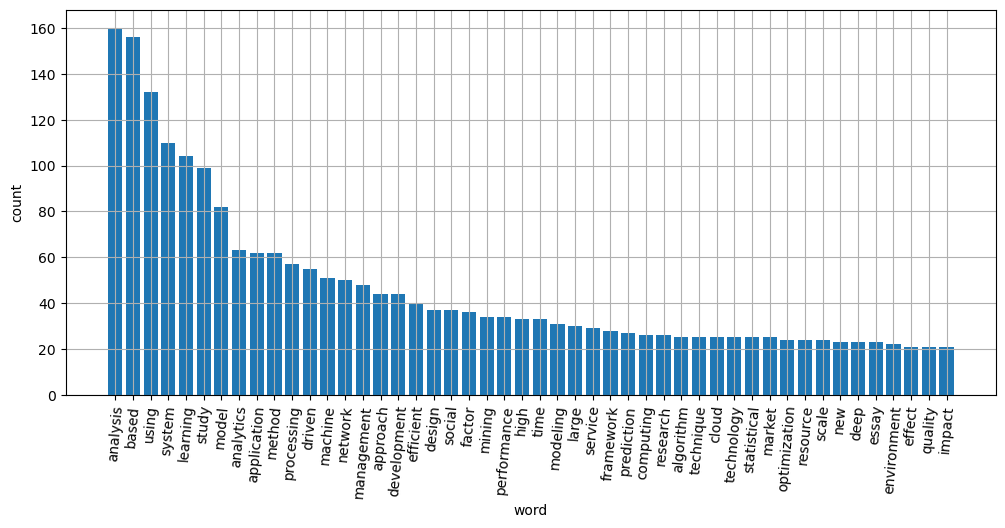

In [24]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)      # value 에러가 뜸. ''제거해야함!

plt.show()

# 3. 분석 모델 구축 및 결과 시각화
## 3-1. 연도별 데이터 수

In [25]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1998,1
3,1999,5
4,2000,13
5,2001,15
6,2002,11
7,2003,10
8,2004,12
9,2005,29


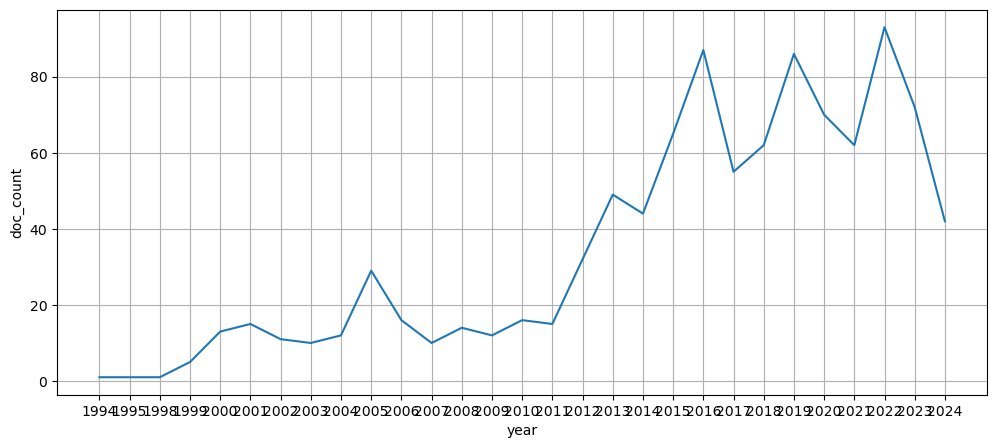

In [28]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc_count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 3-2. 워드클라우드

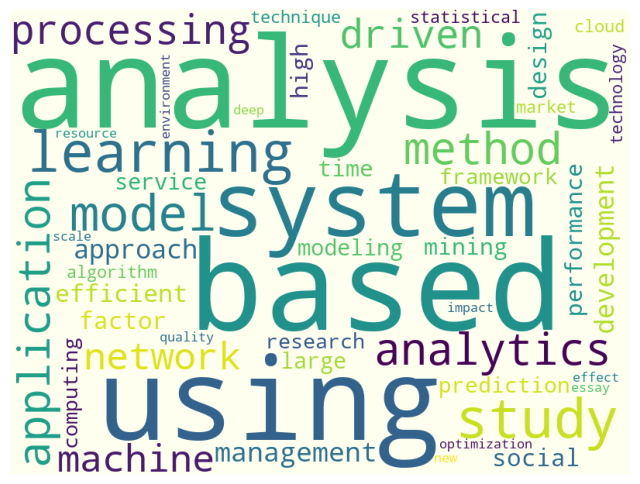

In [29]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 파일에 저장
#### - 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라진다.

In [30]:
cloud.to_file('./riss_bigdata_wordCloud.jpg')

# 8장. 텍스트빈도분석 - 2) 한글 단어 분석

## 한글 단어 분석을 위한 패키지 준비

In [33]:
%pip install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, re
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [38]:
inputFileName = './etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

### 1-2. 분석할 데이터 추출

In [39]:
message = ''

for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message']) + ''

message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

### 1-3. 품사 태깅 : 명사 추출

In [40]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [41]:
count = Counter(message_N)

count

Counter({'차': 23,
         '산업혁명': 22,
         '전자신문': 13,
         '산업': 10,
         '직업': 10,
         '기술': 8,
         '시대': 7,
         '라이브': 7,
         '이번': 6,
         '진흥': 6,
         '포럼': 5,
         '위': 5,
         '일자리': 5,
         '창': 5,
         '조직': 4,
         '터': 4,
         '통해': 4,
         '진행': 4,
         '스파크': 3,
         '미래': 3,
         '변화': 3,
         '사회': 3,
         '기업': 3,
         '로봇': 3,
         '등': 3,
         '노력': 3,
         '서울': 3,
         '시간': 3,
         '방송': 3,
         '대응': 3,
         '주형': 3,
         '철': 3,
         '전자': 3,
         '정보': 3,
         '이슈': 2,
         '소셜': 2,
         '우리': 2,
         '위해': 2,
         '사례': 2,
         '주요': 2,
         '국내': 2,
         '활용': 2,
         '과정': 2,
         '빅데이터': 2,
         '흐름': 2,
         '최고': 2,
         '서비스': 2,
         '영국': 2,
         '한국': 2,
         '경쟁력': 2,
         '제': 2,
         '를': 2,
         '교육': 2,
         '강': 2,
         '만구': 2,
   

In [42]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


### 히스토그램

In [43]:
font_path = "c:/windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

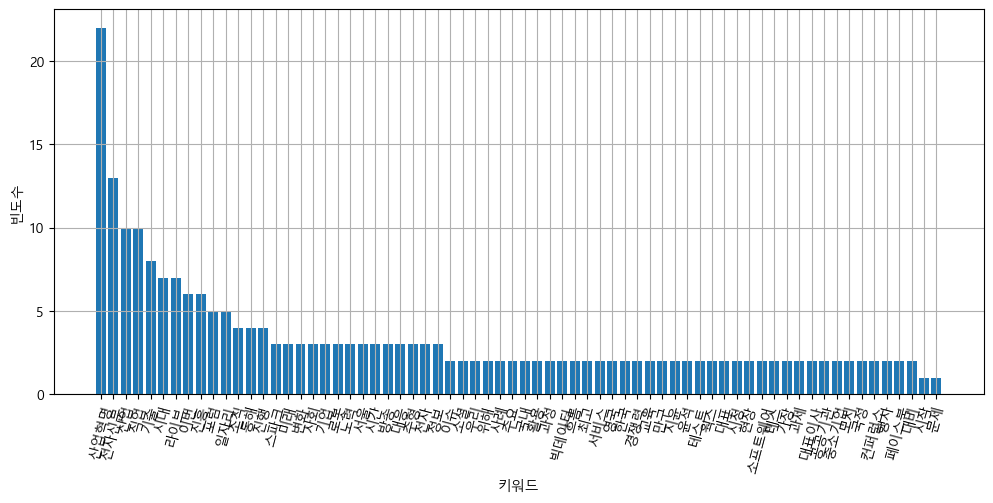

In [45]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

### 워드클라우드

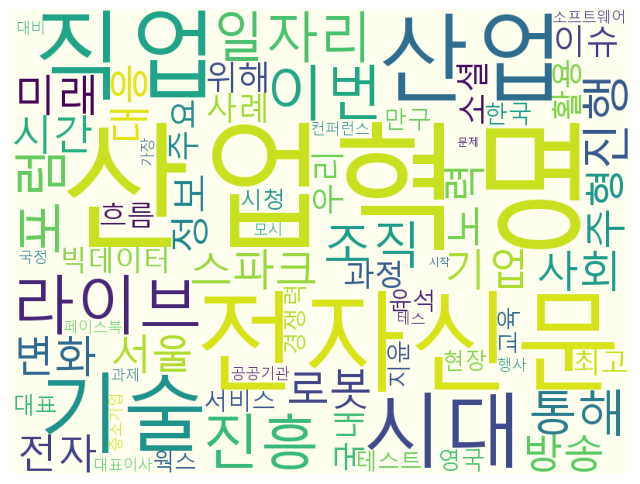

In [47]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [48]:
cloud.to_file(inputFileName + '_cloud.jpg')